In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import cross_val_score

In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"


/content/drive/My Drive/Colab Notebooks/dw_matrix


In [ ]:
df = pd.read_csv('data/men_shoes.csv',low_memory=False)
df.shape

(18280, 48)

In [ ]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [ ]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [ ]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0] # y_true.shape[0]->18280

mean_absolute_error(y_true,y_pred)

63.968341227870624

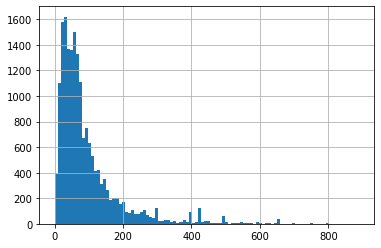

In [ ]:
df['prices_amountmin'].hist(bins=100)

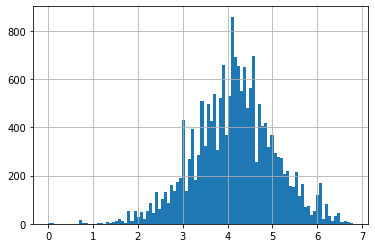

In [ ]:
np.log(df['prices_amountmin'] + 1).hist(bins=100) #plus 1-shift values by 1,log0->inf
#the same result-> np.log1p(df['prices_amountmin']).hist(bins=100) 



In [ ]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0] # y_true.shape[0]->18280

mean_absolute_error(y_true,y_pred)

58.01120240700219

In [ ]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0] # y_true.shape[0]->18280

mean_absolute_error(y_true,y_pred)

58.03539547661041

In [ ]:
np.mean(np.log1p(y_true))

4.157759197235119

In [ ]:
np.exp(np.mean(np.log1p(y_true))) - 1 # the same -> np.expm1(np.mean(np.log1p(y_true)))

62.92811169273113

In [ ]:
df.brand.value_counts()

Nike            1709
PUMA             574
Ralph Lauren     524
New Balance      361
VANS             356
                ... 
Fit & Fresh        1
ZLYC               1
J`S AWAKE          1
AIR BALANCE        1
Wembley            1
Name: brand, Length: 1856, dtype: int64

In [ ]:
df['brand_cat'] = df.brand.factorize()[0]

In [ ]:
#feats = ['brand_cat']

def run_model(feats):

 X = df[feats].values
 y = df['prices_amountmin'].values

 model = DecisionTreeRegressor(max_depth=5)
 scores = cross_val_score(model,X,y,scoring='neg_mean_absolute_error')
 return np.mean(scores), np.std(scores)

In [ ]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [ ]:
df['manufacturer'].value_counts()

Puma              476
Nike              374
New Balance       249
VANS              170
Reebok            128
                 ... 
Lamo                1
J Shoes             1
Urban Pipeline      1
Ridge Footwear      1
Oofos               1
Name: manufacturer, Length: 618, dtype: int64

In [ ]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]


In [ ]:
def run_model_two(feats1,feats2):

 X1 = df[feats1].values
 X2 = df[feats2].values
 y = df['prices_amountmin'].values

 model = DecisionTreeRegressor(max_depth=5)
 scores1 = cross_val_score(model,X1,y,scoring='neg_mean_absolute_error')
 scores2 = cross_val_score(model,X2,y,scoring='neg_mean_absolute_error')
 return print(str(np.mean(scores1)), str(np.std(scores1)) +'\n'+ str(np.mean(scores2)), str(np.std(scores2)))

In [ ]:
run_model_two(['brand_cat'],['manufacturer_cat'])

-58.38655694633361 4.223555478221712
-63.133649278023746 3.394307434888982


In [ ]:
!git push  -u origin master

In [ ]:
!git push  -u origin master

In [ ]:
!git push  -u origin master